# Искусственные нейронные сети

Считываем набор данных цифр MNIST.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [2]:
digits = load_digits()

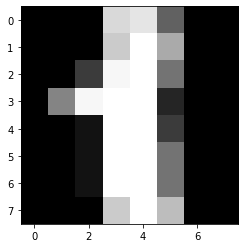

In [3]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [4]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
model = MLPClassifier((64, 64), activation='tanh')

In [7]:
model.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
y_hat = model.predict(test_x)

In [9]:
y_hat

array([6, 1, 7, 9, 2, 6, 2, 2, 5, 0, 4, 5, 1, 5, 2, 4, 5, 5, 3, 7, 7, 2,
       4, 5, 8, 2, 8, 1, 3, 5, 8, 0, 7, 4, 0, 5, 5, 7, 0, 1, 6, 2, 8, 8,
       5, 8, 1, 4, 4, 7, 4, 1, 6, 3, 0, 5, 2, 5, 2, 6, 0, 6, 8, 7, 6, 4,
       2, 5, 1, 3, 0, 7, 5, 4, 0, 6, 1, 3, 5, 2, 4, 6, 1, 8, 1, 2, 7, 9,
       1, 2, 1, 8, 4, 4, 2, 0, 6, 3, 7, 2, 0, 6, 0, 2, 5, 7, 8, 7, 8, 8,
       5, 9, 7, 1, 0, 9, 2, 2, 0, 1, 5, 8, 7, 7, 7, 4, 0, 4, 1, 5, 4, 1,
       1, 3, 3, 9, 2, 8, 1, 2, 4, 7, 6, 2, 9, 3, 4, 2, 2, 9, 1, 5, 2, 0,
       9, 9, 5, 8, 2, 7, 2, 0, 6, 1, 2, 6, 8, 6, 4, 9, 0, 4, 9, 0, 1, 9,
       5, 7, 0, 0, 9, 1, 1, 0, 1, 0, 0, 6, 5, 9, 6, 2, 8, 5, 0, 9, 1, 9,
       4, 5, 1, 2, 9, 6, 7, 6, 0, 9, 4, 6, 3, 1, 8, 4, 4, 0, 9, 5, 0, 9,
       7, 4, 1, 9, 6, 5, 8, 3, 6, 2, 2, 9, 7, 1, 1, 2, 2, 4, 1, 3, 5, 7,
       2, 4, 9, 3, 3, 5, 0, 6, 8, 9, 0, 6, 6, 2, 1, 8, 6, 6, 2, 1, 0, 6,
       4, 3, 0, 3, 8, 1, 4, 7, 4, 7, 6, 2, 1, 1, 9, 1, 8, 7, 3, 9, 6, 8,
       1, 6, 1, 0, 9, 5, 5, 8, 0, 2, 9, 4, 5, 7, 3,

In [10]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 24,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 33]])

In [11]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.93617021, 0.975     , 0.96      , 0.97142857,
        1.        , 1.        , 1.        , 0.93548387, 0.97058824]),
 array([1.        , 0.93617021, 1.        , 0.96      , 1.        ,
        1.        , 0.97297297, 0.97142857, 0.93548387, 0.97058824]),
 array([1.        , 0.93617021, 0.98734177, 0.96      , 0.98550725,
        1.        , 0.98630137, 0.98550725, 0.93548387, 0.97058824]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [12]:
accuracy_score(test_y.reshape(-1), y_hat)

0.975

Теперь попробуем сверточные и рекуррентные сети из Keras

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

Хорошо, сперва полносвязанная сеть.

In [14]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001), 
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )


In [15]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(10)
    y2[y] = 1
    train_y2.append(y2)
    
test_y2 = []
for y in test_y:
    y2 = np.zeros(10)
    y2[y] = 1
    test_y2.append(y2)
    
train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [16]:
train_y2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
model.fit(train_x, train_y2, epochs=100)

Epoch 1/100
45/45 [==============================] - 0s 1ms/step - loss: 3.2573 - accuracy: 0.1113
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 3.0886 - accuracy: 0.1914
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 2.9366 - accuracy: 0.2874
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 2.7863 - accuracy: 0.3653
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 2.6358 - accuracy: 0.4572
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 2.4833 - accuracy: 0.5379
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 2.3309 - accuracy: 0.6096
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 2.1810 - accuracy: 0.6555
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 2.0414 - accuracy: 0.6882
Epoch 10/100
45/45 [==============================] - 0s 1ms/step - loss: 1.9149 - accuracy: 0.7182
Epoch 11/

45/45 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.9833
Epoch 84/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.9840
Epoch 85/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.9840
Epoch 86/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.9847
Epoch 87/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.9840
Epoch 88/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.9847
Epoch 89/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.9854
Epoch 90/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.9861
Epoch 91/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.9868
Epoch 92/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.9868
Epoch 93/100


In [18]:
y_hat = model.predict(test_x)

In [19]:
y_hat

array([[3.83038400e-03, 1.35019945e-03, 4.27016942e-03, ...,
        5.59367589e-04, 7.37461681e-03, 2.53849983e-04],
       [1.37325109e-03, 9.29295480e-01, 2.46287864e-02, ...,
        2.30596255e-04, 6.21364545e-03, 6.05499279e-03],
       [1.12199935e-03, 1.28262525e-03, 2.33234428e-02, ...,
        9.57780123e-01, 6.09438401e-03, 5.27596509e-04],
       ...,
       [4.41143056e-03, 3.75998759e-04, 2.83357501e-03, ...,
        2.06508231e-03, 1.20894695e-02, 1.37963667e-04],
       [2.12029205e-03, 2.44321092e-03, 5.49480412e-03, ...,
        9.72295642e-01, 6.96679484e-03, 1.59243995e-03],
       [3.82971428e-02, 3.77374500e-01, 9.50216968e-03, ...,
        6.03742041e-02, 2.46788651e-01, 2.29069460e-02]], dtype=float32)

In [20]:
test_y

array([[6, 1, 7, 9, 2, 6, 2, 2, 5, 0, 4, 5, 1, 5, 2, 4, 5, 5, 3, 7, 7, 2,
        4, 5, 8, 2, 8, 1, 9, 5, 8, 0, 7, 4, 0, 5, 5, 7, 0, 1, 6, 2, 8, 8,
        5, 8, 1, 4, 4, 7, 4, 1, 6, 3, 0, 5, 2, 5, 2, 6, 0, 6, 1, 7, 6, 4,
        2, 5, 1, 3, 0, 7, 5, 4, 0, 6, 1, 3, 5, 2, 4, 6, 1, 8, 8, 2, 7, 9,
        1, 2, 1, 8, 4, 4, 3, 0, 6, 3, 7, 2, 0, 6, 0, 2, 5, 7, 8, 7, 8, 8,
        5, 9, 7, 1, 0, 9, 2, 2, 0, 1, 5, 8, 7, 7, 7, 4, 0, 4, 1, 5, 4, 1,
        1, 3, 3, 9, 2, 8, 1, 2, 4, 7, 6, 2, 9, 3, 4, 2, 2, 9, 1, 5, 2, 0,
        9, 9, 5, 8, 2, 7, 2, 0, 6, 1, 2, 6, 8, 6, 4, 9, 0, 4, 9, 0, 1, 9,
        5, 7, 0, 0, 9, 1, 1, 0, 1, 0, 0, 6, 5, 9, 6, 2, 8, 5, 0, 9, 1, 9,
        4, 5, 1, 2, 9, 6, 7, 6, 0, 9, 4, 6, 3, 1, 8, 4, 4, 0, 9, 5, 0, 9,
        7, 7, 1, 9, 6, 5, 8, 3, 6, 2, 2, 9, 7, 1, 1, 2, 2, 4, 1, 3, 5, 7,
        2, 4, 1, 3, 3, 5, 0, 6, 8, 9, 0, 6, 6, 2, 1, 8, 6, 6, 2, 1, 0, 6,
        4, 3, 0, 3, 8, 1, 4, 7, 4, 7, 6, 2, 1, 1, 9, 1, 1, 7, 3, 9, 6, 8,
        8, 6, 1, 0, 9, 5, 5, 8, 0, 2, 

In [21]:
y_hat = [np.argmax(y) for y in y_hat]

In [22]:
y_hat

[6,
 1,
 7,
 9,
 2,
 6,
 2,
 2,
 5,
 0,
 4,
 5,
 1,
 5,
 2,
 4,
 5,
 5,
 3,
 7,
 7,
 2,
 4,
 5,
 8,
 2,
 8,
 1,
 3,
 5,
 8,
 0,
 7,
 4,
 0,
 5,
 5,
 7,
 0,
 1,
 6,
 2,
 8,
 8,
 5,
 8,
 1,
 4,
 4,
 7,
 4,
 1,
 6,
 3,
 0,
 5,
 2,
 5,
 2,
 6,
 0,
 6,
 1,
 7,
 6,
 4,
 2,
 5,
 1,
 3,
 0,
 7,
 5,
 4,
 0,
 6,
 1,
 3,
 5,
 2,
 4,
 6,
 1,
 8,
 1,
 2,
 7,
 9,
 1,
 2,
 1,
 8,
 4,
 4,
 8,
 0,
 6,
 3,
 7,
 2,
 0,
 6,
 0,
 2,
 5,
 7,
 8,
 7,
 8,
 8,
 5,
 9,
 7,
 1,
 0,
 9,
 2,
 2,
 0,
 1,
 5,
 8,
 7,
 7,
 7,
 4,
 0,
 4,
 1,
 5,
 4,
 1,
 1,
 3,
 3,
 9,
 2,
 8,
 1,
 2,
 4,
 7,
 6,
 2,
 9,
 3,
 4,
 1,
 2,
 9,
 1,
 5,
 2,
 0,
 9,
 9,
 5,
 8,
 2,
 7,
 2,
 0,
 6,
 1,
 2,
 6,
 8,
 6,
 4,
 9,
 0,
 4,
 9,
 0,
 1,
 9,
 9,
 7,
 0,
 0,
 9,
 1,
 1,
 0,
 1,
 0,
 0,
 6,
 5,
 9,
 6,
 2,
 8,
 5,
 0,
 9,
 1,
 9,
 4,
 5,
 1,
 2,
 9,
 6,
 7,
 6,
 0,
 9,
 4,
 6,
 3,
 1,
 8,
 4,
 4,
 0,
 9,
 5,
 0,
 9,
 7,
 7,
 1,
 9,
 6,
 5,
 8,
 3,
 6,
 2,
 2,
 9,
 7,
 1,
 1,
 2,
 2,
 4,
 1,
 3,
 5,
 7,
 2,
 4,
 1,
 3,
 3,
 5,
 0,
 6,


In [23]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 33]])

In [24]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.94      , 1.        , 0.96      , 1.        ,
        1.        , 1.        , 1.        , 0.96666667, 0.97058824]),
 array([1.        , 1.        , 0.97435897, 0.96      , 1.        ,
        0.97222222, 1.        , 1.        , 0.93548387, 0.97058824]),
 array([1.        , 0.96907216, 0.98701299, 0.96      , 1.        ,
        0.98591549, 1.        , 1.        , 0.95081967, 0.97058824]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [25]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9833333333333333

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8320      
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


Теперь сверточные сети.

In [27]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))


In [28]:
train_x3 = train_x.reshape(-1, 64, 1)
train_y3 = train_y2.reshape(-1, 10, 1)
test_x3 = test_x.reshape(-1, 64, 1)
test_y3 = test_y2.reshape(-1, 10, 1)

In [29]:
model.fit(train_x3, train_y3, epochs=20)#, validation_data=(test_x3, test_y3))

Epoch 1/20
45/45 [==============================] - 0s 3ms/step - loss: 1.7866
Epoch 2/20
45/45 [==============================] - 0s 3ms/step - loss: 1.0138
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.9008
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.5518
Epoch 5/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4961
Epoch 6/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4921
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4486
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4421
Epoch 9/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4237
Epoch 10/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4174
Epoch 11/20
45/45 [==============================] - 0s 3ms/step - loss: 0.4281
Epoch 12/20
45/45 [==============================] - 0s 3ms/step - loss: 0.3836
Epoch 13/20
45/45 [==============================

In [30]:
y_hat = model.predict(test_x3)

In [31]:
y_hat = [np.argmax(y) for y in y_hat]

In [32]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  1,  0,  1,  0,  0,  1, 26,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 32]])

In [33]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.91666667, 0.975     , 0.92592593, 0.97058824,
        1.        , 1.        , 0.97222222, 0.96296296, 0.94117647]),
 array([1.        , 0.93617021, 1.        , 1.        , 0.97058824,
        1.        , 0.97297297, 1.        , 0.83870968, 0.94117647]),
 array([1.        , 0.92631579, 0.98734177, 0.96153846, 0.97058824,
        1.        , 0.98630137, 0.98591549, 0.89655172, 0.94117647]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [34]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  128       
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  3104      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  19210     
Total params: 22,442
Trainable params: 22,442
Non-trainable params: 0
_________________________________________________________________


LSTM

In [36]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64)))
# model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.), 
               keras.losses.MeanSquaredError(reduction='sum'),
               metrics=[keras.metrics.Precision()])



In [37]:
model.fit(train_x3, train_y3, epochs=20)

Epoch 1/20
45/45 [==============================] - 1s 28ms/step - loss: 2.7943 - precision: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 1s 30ms/step - loss: 2.1117 - precision: 0.9182
Epoch 3/20
45/45 [==============================] - 1s 30ms/step - loss: 1.3725 - precision: 0.8791
Epoch 4/20
45/45 [==============================] - 1s 28ms/step - loss: 1.0999 - precision: 0.8693
Epoch 5/20
45/45 [==============================] - 2s 33ms/step - loss: 0.9243 - precision: 0.8821
Epoch 6/20
45/45 [==============================] - 2s 35ms/step - loss: 0.8178 - precision: 0.8966
Epoch 7/20
45/45 [==============================] - 1s 33ms/step - loss: 0.7078 - precision: 0.9017
Epoch 8/20
45/45 [==============================] - 1s 28ms/step - loss: 0.6976 - precision: 0.8970
Epoch 9/20
45/45 [==============================] - 1s 27ms/step - loss: 0.6698 - precision: 0.9032
Epoch 10/20
45/45 [==============================] - 1s 31ms/step - loss: 0.5591 - precision: 0.

In [38]:
y_hat = model.predict(test_x3)

In [39]:
y_hat = [np.argmax(y) for y in y_hat]

In [40]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  1,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  0, 33,  2,  0,  0,  1,  0,  0,  2],
       [ 0,  0,  2, 20,  0,  0,  0,  0,  2,  1],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0, 34,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1, 33,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  5,  0,  0,  1, 27]])

In [41]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.97674419, 0.93617021, 0.91666667, 0.74074074, 1.        ,
        0.875     , 0.94444444, 0.97058824, 0.85294118, 0.9       ]),
 array([1.        , 0.93617021, 0.84615385, 0.8       , 0.97058824,
        0.97222222, 0.91891892, 0.94285714, 0.93548387, 0.79411765]),
 array([0.98823529, 0.93617021, 0.88      , 0.76923077, 0.98507463,
        0.92105263, 0.93150685, 0.95652174, 0.89230769, 0.84375   ]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [42]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9166666666666666

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  33792     
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  1290      
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________
